<a href="https://colab.research.google.com/github/vikkyfury/code_snippets/blob/master/logistic_regression_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [222]:
from sklearn.datasets import fetch_openml


In [223]:
titanic_data=fetch_openml('titanic',version=1,as_frame=True)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [224]:
type(titanic_data)

sklearn.utils._bunch.Bunch

In [225]:
titanic_data

{'data':       pclass                                             name     sex  \
 0        1.0                    Allen, Miss. Elisabeth Walton  female   
 1        1.0                   Allison, Master. Hudson Trevor    male   
 2        1.0                     Allison, Miss. Helen Loraine  female   
 3        1.0             Allison, Mr. Hudson Joshua Creighton    male   
 4        1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
 ...      ...                                              ...     ...   
 1304     3.0                             Zabour, Miss. Hileni  female   
 1305     3.0                            Zabour, Miss. Thamine  female   
 1306     3.0                        Zakarian, Mr. Mapriededer    male   
 1307     3.0                              Zakarian, Mr. Ortin    male   
 1308     3.0                               Zimmerman, Mr. Leo    male   
 
           age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
 0     29.0000    0.0

In [226]:
df=titanic_data['data']
df['Survived']=titanic_data['target']
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='Survived', ylabel='count'>

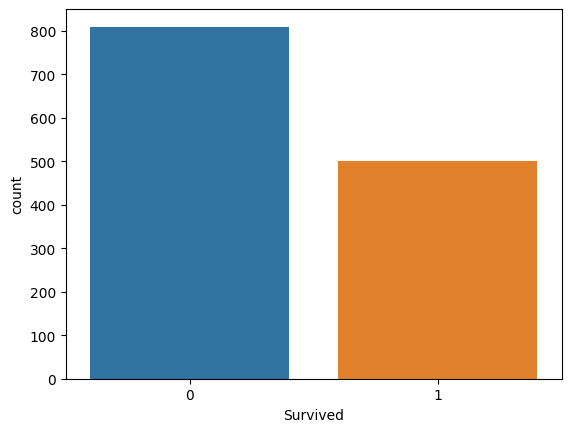

In [227]:
sns.countplot(data=df,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

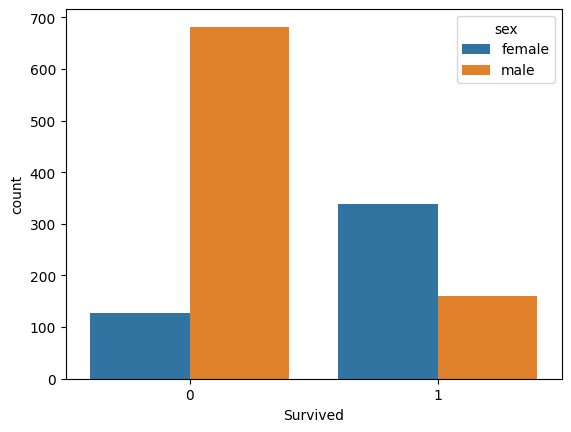

In [228]:
sns.countplot(data=df,hue='sex',x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

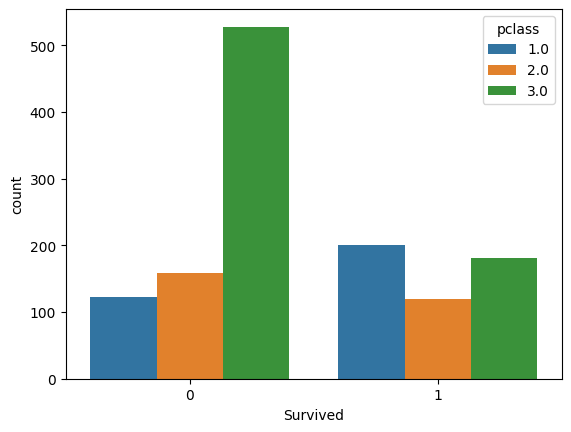

In [229]:
sns.countplot(data=df,hue='pclass',x='Survived')

<Axes: xlabel='pclass', ylabel='count'>

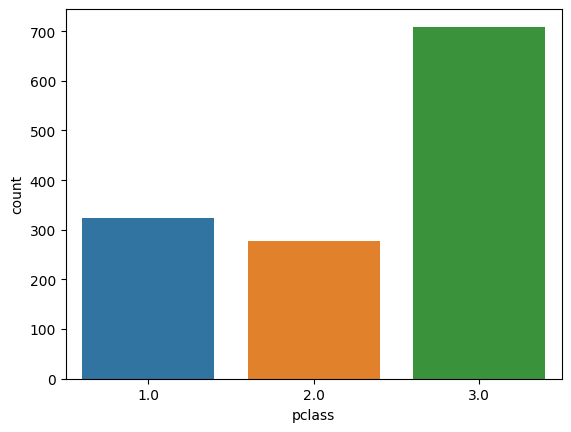

In [230]:
sns.countplot(data=df,x='pclass')

<Axes: xlabel='sex', ylabel='count'>

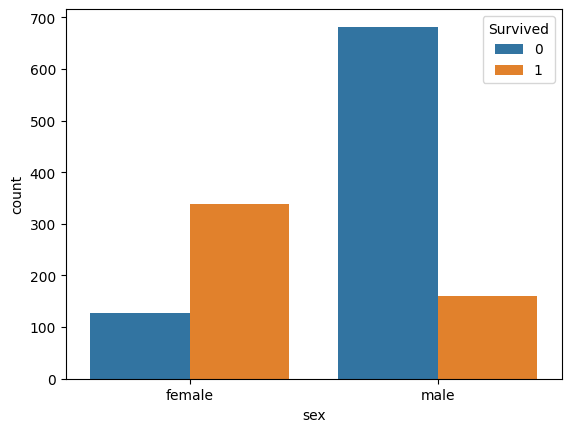

In [231]:
sns.countplot(data=df,x='sex',hue='Survived')

<Axes: ylabel='Frequency'>

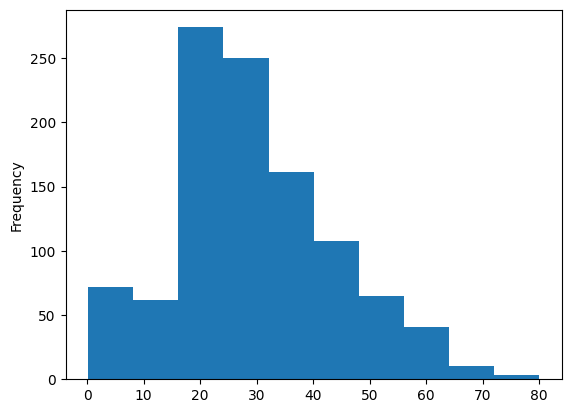

In [232]:
df['age'].plot.hist()

<ipython-input-233-f022cdf5a64f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde=True)


<Axes: xlabel='age', ylabel='Density'>

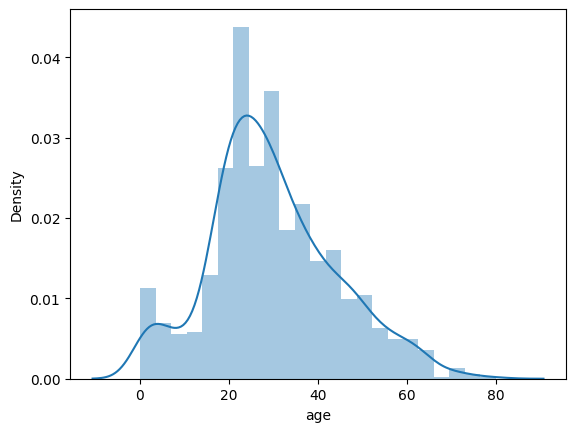

In [233]:
sns.distplot(df['age'],kde=True)

In [234]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
Survived        0
dtype: int64

<Axes: title={'center': 'missing vals in %'}, ylabel='percentage'>

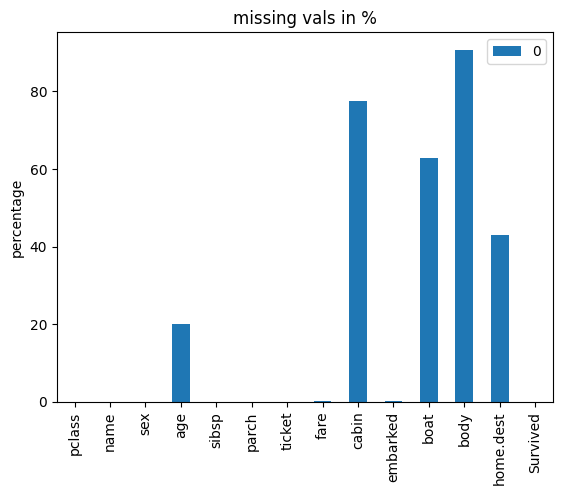

In [235]:
#finding percentages of missing values
miss_vals=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_vals.plot(kind='bar',title='missing vals in %',ylabel='percentage')

In [236]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0,'travelled_alone']=0
df.loc[df['family']==0,'travelled_alone']=1

In [237]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Survived,family,travelled_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1,0.0,1.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3.0,0.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,3.0,0.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,3.0,0.0


In [238]:
df.drop(['sibsp','parch','ticket','home.dest','body','cabin','boat','name'],axis=1,inplace=True)
df.head()

,pclass,sex,age,fare,embarked,Survived,family,travelled_alone
0,1.0,female,29.0000,211.3375,S,1,0.0,1.0
1,1.0,male,0.9167,151.5500,S,1,3.0,0.0
2,1.0,female,2.0000,151.5500,S,0,3.0,0.0
3,1.0,male,30.0000,151.5500,S,0,3.0,0.0
4,1.0,female,25.0000,151.5500,S,0,3.0,0.0


<Axes: xlabel='travelled_alone', ylabel='count'>

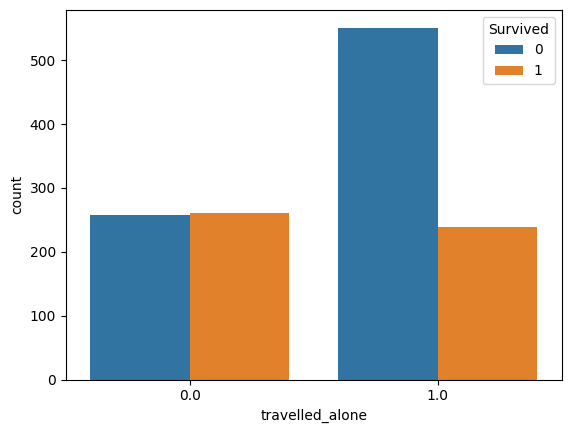

In [239]:
sns.countplot(data=df,hue='Survived',x='travelled_alone')

In [240]:
df['travelled_alone'].value_counts()

1.0    790
0.0    519
Name: travelled_alone, dtype: int64

In [241]:
gender=pd.get_dummies(df['sex'],drop_first=True)
print(gender)

      male
0        0
1        1
2        0
3        1
4        0
...    ...
1304     0
1305     0
1306     1
1307     1
1308     1

[1309 rows x 1 columns]


In [242]:
df=pd.concat([df,gender],axis=1)
df

,pclass,sex,age,fare,embarked,Survived,family,travelled_alone,male
0,1.0,female,29.0000,211.3375,S,1,0.0,1.0,0
1,1.0,male,0.9167,151.5500,S,1,3.0,0.0,1
2,1.0,female,2.0000,151.5500,S,0,3.0,0.0,0
3,1.0,male,30.0000,151.5500,S,0,3.0,0.0,1
4,1.0,female,25.0000,151.5500,S,0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,0,1.0,0.0,0
1305,3.0,female,NaN,14.4542,C,0,1.0,0.0,0
1306,3.0,male,26.5000,7.2250,C,0,0.0,1.0,1
1307,3.0,male,27.0000,7.2250,C,0,0.0,1.0,1


In [243]:
df.drop('sex',axis=1,inplace=True)
df

,pclass,age,fare,embarked,Survived,family,travelled_alone,male
0,1.0,29.0000,211.3375,S,1,0.0,1.0,0
1,1.0,0.9167,151.5500,S,1,3.0,0.0,1
2,1.0,2.0000,151.5500,S,0,3.0,0.0,0
3,1.0,30.0000,151.5500,S,0,3.0,0.0,1
4,1.0,25.0000,151.5500,S,0,3.0,0.0,0
...,...,...,...,...,...,...,...,...
1304,3.0,14.5000,14.4542,C,0,1.0,0.0,0
1305,3.0,NaN,14.4542,C,0,1.0,0.0,0
1306,3.0,26.5000,7.2250,C,0,0.0,1.0,1
1307,3.0,27.0000,7.2250,C,0,0.0,1.0,1


In [244]:
embark=pd.get_dummies(df['embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [245]:
df.drop('embarked',axis=1,inplace=True)


In [246]:
embark


,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [247]:
pd.concat([df,embark],axis=1)


,pclass,age,fare,Survived,family,travelled_alone,male,Q,S
0,1.0,29.0000,211.3375,1,0.0,1.0,0,0,1
1,1.0,0.9167,151.5500,1,3.0,0.0,1,0,1
2,1.0,2.0000,151.5500,0,3.0,0.0,0,0,1
3,1.0,30.0000,151.5500,0,3.0,0.0,1,0,1
4,1.0,25.0000,151.5500,0,3.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3.0,14.5000,14.4542,0,1.0,0.0,0,0,0
1305,3.0,NaN,14.4542,0,1.0,0.0,0,0,0
1306,3.0,26.5000,7.2250,0,0.0,1.0,1,0,0
1307,3.0,27.0000,7.2250,0,0.0,1.0,1,0,0


In [248]:
df=pd.concat([df,embark],axis=1)

In [249]:
df


,pclass,age,fare,Survived,family,travelled_alone,male,Q,S
0,1.0,29.0000,211.3375,1,0.0,1.0,0,0,1
1,1.0,0.9167,151.5500,1,3.0,0.0,1,0,1
2,1.0,2.0000,151.5500,0,3.0,0.0,0,0,1
3,1.0,30.0000,151.5500,0,3.0,0.0,1,0,1
4,1.0,25.0000,151.5500,0,3.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3.0,14.5000,14.4542,0,1.0,0.0,0,0,0
1305,3.0,NaN,14.4542,0,1.0,0.0,0,0,0
1306,3.0,26.5000,7.2250,0,0.0,1.0,1,0,0
1307,3.0,27.0000,7.2250,0,0.0,1.0,1,0,0


In [250]:
df.isnull().mean()

pclass             0.000000
age                0.200917
fare               0.000764
Survived           0.000000
family             0.000000
travelled_alone    0.000000
male               0.000000
Q                  0.000000
S                  0.000000
dtype: float64

In [251]:
#handling missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')


In [252]:
df['age']=imp.fit_transform(df[['age']])
df['fare']=imp.fit_transform(df[['fare']])
df.isnull().sum()

pclass             0
age                0
fare               0
Survived           0
family             0
travelled_alone    0
male               0
Q                  0
S                  0
dtype: int64

In [253]:
y=df['Survived']
y.head()


0    1
1    1
2    0
3    0
4    0
Name: Survived, dtype: category
Categories (2, object): ['0', '1']

In [254]:
df.drop('Survived',axis=1,inplace=True)

In [255]:
df

,pclass,age,fare,family,travelled_alone,male,Q,S
0,1.0,29.000000,211.3375,0.0,1.0,0,0,1
1,1.0,0.916700,151.5500,3.0,0.0,1,0,1
2,1.0,2.000000,151.5500,3.0,0.0,0,0,1
3,1.0,30.000000,151.5500,3.0,0.0,1,0,1
4,1.0,25.000000,151.5500,3.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...
1304,3.0,14.500000,14.4542,1.0,0.0,0,0,0
1305,3.0,29.881135,14.4542,1.0,0.0,0,0,0
1306,3.0,26.500000,7.2250,0.0,1.0,1,0,0
1307,3.0,27.000000,7.2250,0.0,1.0,1,0,0


In [256]:
X=df
X.head()

,pclass,age,fare,family,travelled_alone,male,Q,S
0,1.0,29.0000,211.3375,0.0,1.0,0,0,1
1,1.0,0.9167,151.5500,3.0,0.0,1,0,1
2,1.0,2.0000,151.5500,3.0,0.0,0,0,1
3,1.0,30.0000,151.5500,3.0,0.0,1,0,1
4,1.0,25.0000,151.5500,3.0,0.0,0,0,1


In [257]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [259]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(916, 8) (916,)
(393, 8) (393,)


In [260]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [261]:
pred=lr.predict(X_test)

In [262]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[217,  29],
       [ 48,  99]])

In [263]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8040712468193384